In [1137]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.options.display.max_columns = None

In [1121]:
test_raw = pd.read_csv("test.csv")
train_raw = pd.read_csv("train.csv")

In [1122]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1123]:
train_raw = train_raw[train_raw['SalePrice'] < 450000]

Looking at the distribution of prices seems like the bulk of sales are between 100,000 and 200,000

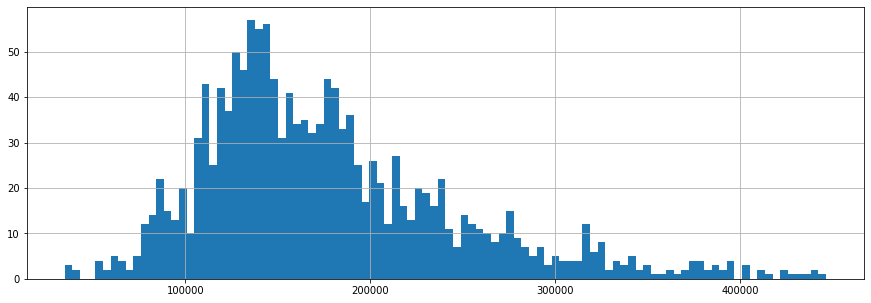

In [1124]:
train_raw['SalePrice'].hist(bins=100, figsize=(15, 5))

In [1125]:
bins = [110000, 200000]
groups = train_raw.groupby(np.digitize(train_raw['SalePrice'], bins))

groups.mean() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,700.222857,62.057143,56.981250,7336.605714,4.485714,5.234286,1939.874286,1965.274286,24.405714,166.251429,17.674286,460.577143,644.502857,855.262857,181.651429,12.274286,1049.188571,0.205714,0.017143,1.131429,0.108571,2.394286,1.108571,5.365714,0.125714,1954.976190,0.971429,262.182857,33.348571,20.960000,41.702857,0.000000,0.685714,0.000000,47.622857,6.177143,2007.960000,89640.748571
1,752.974118,59.052941,67.296784,9423.358824,5.716471,5.742353,1967.136471,1981.649412,72.722550,405.251765,52.887059,514.607059,972.745882,1077.727059,286.584706,5.208235,1369.520000,0.395294,0.077647,1.442353,0.361176,2.870588,1.052941,6.195294,0.530588,1974.040244,1.630588,430.322353,81.703529,36.112941,22.296471,3.256471,15.175294,2.004706,53.129412,6.234118,2007.801176,151646.784706
2,694.971496,50.736342,80.508721,13737.361045,7.429929,5.387173,1991.843230,1998.881235,185.151079,612.106888,46.023753,707.605701,1365.736342,1431.527316,519.422803,3.292162,1954.242280,0.570071,0.033254,1.961995,0.524941,3.045131,1.009501,7.524941,0.952494,1993.496420,2.332542,634.327791,141.505938,76.156770,13.783848,5.249406,18.973872,4.201900,23.752969,6.593824,2007.783848,265424.204276


In [1126]:
groups.nunique()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,175,13,4,40,135,2,2,3,4,1,4,3,13,6,4,5,8,7,8,60,41,5,2,13,15,3,19,3,4,5,3,3,4,6,67,5,12,124,103,5,5,2,5,126,47,7,133,3,2,3,3,6,3,4,10,6,3,3,6,61,3,4,64,4,3,3,34,36,44,1,2,1,0,3,2,10,12,5,5,5,97
1,850,15,5,89,627,2,2,4,4,2,5,3,25,9,7,5,8,7,7,105,61,6,7,10,14,4,191,4,4,6,4,3,4,6,420,6,104,530,449,4,4,2,4,488,237,15,524,4,3,4,3,7,4,4,10,7,4,5,6,94,3,5,259,5,5,3,193,132,84,13,55,4,2,4,3,14,12,5,8,6,293
2,421,11,4,91,390,2,2,4,4,1,5,3,19,7,3,5,7,7,8,74,43,6,5,11,13,4,199,4,3,5,4,3,4,6,260,6,35,350,347,2,4,2,2,344,186,4,354,3,2,4,3,8,2,4,10,5,4,4,4,72,3,5,266,3,3,3,145,144,26,10,31,4,3,3,2,8,12,5,8,5,259


In [1127]:
def get_quality_cols(data):
    quality_cols = data.columns[data.isin(['Ex','Po']).any()]  #'Gd', 'TA', 'Fa', 
    return quality_cols

def cols_by_type(data):
    colsbytype = {}
    for idx, val in zip(data.dtypes.index, data.dtypes.values):
        if idx == 'SalePrice':
            continue
        val = str(val)
        curr = colsbytype.get(val, set())
        curr.add(idx)
        colsbytype[val] = curr
    for key in colsbytype.keys():
        columns = list(colsbytype[key])
        columns.sort()
        colsbytype[key] = columns
    return colsbytype

get_quality_cols(train_raw)

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'],
      dtype='object')

In [1128]:
def clean_data(train_raw, test_raw):
    train = train_raw.copy()
    test = test_raw.copy()
    for data in [train, test]:
        colsbytype = cols_by_type(data)
        data[colsbytype['object']] = data[colsbytype['object']].fillna('NA')
        data[colsbytype['int64']] = data[colsbytype['int64']].fillna(0)
        data[colsbytype['float64']] = data[colsbytype['float64']].fillna(0.0)
    return train,test

def get_age_info(train,test):
    for data in [train,test]:
        data['age'] = data['YrSold'] - data['YearBuilt'] 
#         data['facelift'] = data['YearRemodAdd'] - data['YearBuilt']

        del data['YrSold']
        del data['YearBuilt']
#         del data['YearRemodAdd']

    return train, test    

def get_baths(train, test):
    for data in [train,test]:
        data['bathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])
        
        del data['FullBath']
        del data['HalfBath']
        del data['BsmtFullBath'] 
        del data['BsmtHalfBath']
    
    return train, test

def get_size(train,test):
    for data in [train,test]:
        data['totalsqft'] = data["1stFlrSF"] + data["2ndFlrSF"]
    return train, test    

def map_quality_values(train,test):
    qual_map = {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1, 'NA':0}
    for data in [train,test]:
        quality_cols = get_quality_cols(data)  
        data[quality_cols] = data[quality_cols].replace(qual_map)
    return train, test    
    

def expand_dummies(train, test, vals, col):
    for data in [train,test]:
        for val in vals:
            data[col + "_" + val] = data.apply(lambda row: row[col] == val, axis=1)
        del data[col]
    return train, test

def expand_data(data):
    cols = [
                'Id', 'age','YearRemodAdd','bathrooms','BedroomAbvGr', 'totalsqft',
                'LotFrontage','OverallQual', 
                'GarageCars', 'GarageYrBlt',
                'GarageArea','PoolArea','LotArea','MasVnrArea','GrLivArea',
                'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                'TotRmsAbvGrd','Fireplaces'
            ]
    cols.extend(get_quality_cols(train_raw))
    new_data = data[cols].copy()

    columns = [
                'CentralAir','MSZoning','SaleCondition','SaleType','Functional', #'MSSubClass'
                'Neighborhood','BldgType'
              ]
    for column in columns:
        gen_dummies = pd.get_dummies(data[column], prefix = column)   
        new_data = pd.concat([new_data, gen_dummies],axis=1)    
    return new_data
    
train, test = clean_data(train_raw, test_raw)
print("Any Nulls: ", train.isnull().values.any(), test.isnull().values.any())

train, test = map_quality_values(train,test)
train, test = get_age_info(train, test)
train, test = get_baths(train, test)
print("Any Nulls: ", train.isnull().values.any(), test.isnull().values.any())

train, test = get_size(train, test)
    
vals = ['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl']
col = 'HouseStyle'  
train,test = expand_dummies(train, test, vals, col)


train = expand_data(train)
test  = expand_data(test)

train = pd.concat([train_raw['SalePrice'], train],axis=1)    

train.head()

Any Nulls:  False False
Any Nulls:  False False


,SalePrice,Id,age,YearRemodAdd,bathrooms,BedroomAbvGr,totalsqft,LotFrontage,OverallQual,GarageCars,GarageYrBlt,GarageArea,PoolArea,LotArea,MasVnrArea,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotRmsAbvGrd,Fireplaces,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,CentralAir_N,CentralAir_Y,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,208500,1,5,2003,3.5,3,1710,65.0,7,2,2003.0,548,0,8450,196.0,1710,0,61,0,0,0,8,0,4,3,4,3,5,4,0,3,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,181500,2,31,1976,2.5,3,1262,80.0,6,2,1976.0,460,0,9600,0.0,1262,298,0,0,0,0,6,1,3,3,4,3,5,3,3,3,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,223500,3,7,2002,3.5,3,1786,68.0,7,2,2001.0,608,0,11250,162.0,1786,0,42,0,0,0,6,1,4,3,4,3,5,4,3,3,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,140000,4,91,1970,2.0,3,1717,60.0,7,3,1998.0,642,0,9550,0.0,1717,0,35,272,0,0,7,1,3,3,3,4,4,4,4,3,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,250000,5,8,2000,3.5,4,2198,84.0,8,3,2000.0,836,0,14260,350.0,2198,192,84,0,0,0,9,1,4,3,4,3,5,4,3,3,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1130]:
print("Any Nulls: ", train.isnull().values.any(), test.isnull().values.any())
cols = train.columns[2:]

Any Nulls:  False False


In [1138]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[cols])
X_test = scaler.transform(test[cols])

In [1139]:
state = 12  
test_size = 0.30  

X_train, X_val, y_train, y_val = train_test_split(X_train, train[['SalePrice']],  
    test_size=test_size, random_state=state)

In [1143]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = ensemble.GradientBoostingRegressor(n_estimators=500, learning_rate=learning_rate, 
                                        random_state=0)
    gb_clf.fit(X_train, y_train.values.ravel())

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.973
Accuracy score (validation): 0.875
Learning rate:  0.075
Accuracy score (training): 0.984
Accuracy score (validation): 0.878
Learning rate:  0.1
Accuracy score (training): 0.989
Accuracy score (validation): 0.874
Learning rate:  0.25
Accuracy score (training): 0.999
Accuracy score (validation): 0.863
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.847
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.781
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.765


In [1152]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[cols])
X_test = scaler.transform(test[cols])

params = {'n_estimators': 500,
#           'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.075,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, train[['SalePrice']].values.ravel())

mse = mean_squared_error(train[['SalePrice']], reg.predict(X_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 115212185.0042


In [1154]:
r2_score(train[['SalePrice']], reg.predict(X_train)) # 0.9783238580853222

0.9764371256673906

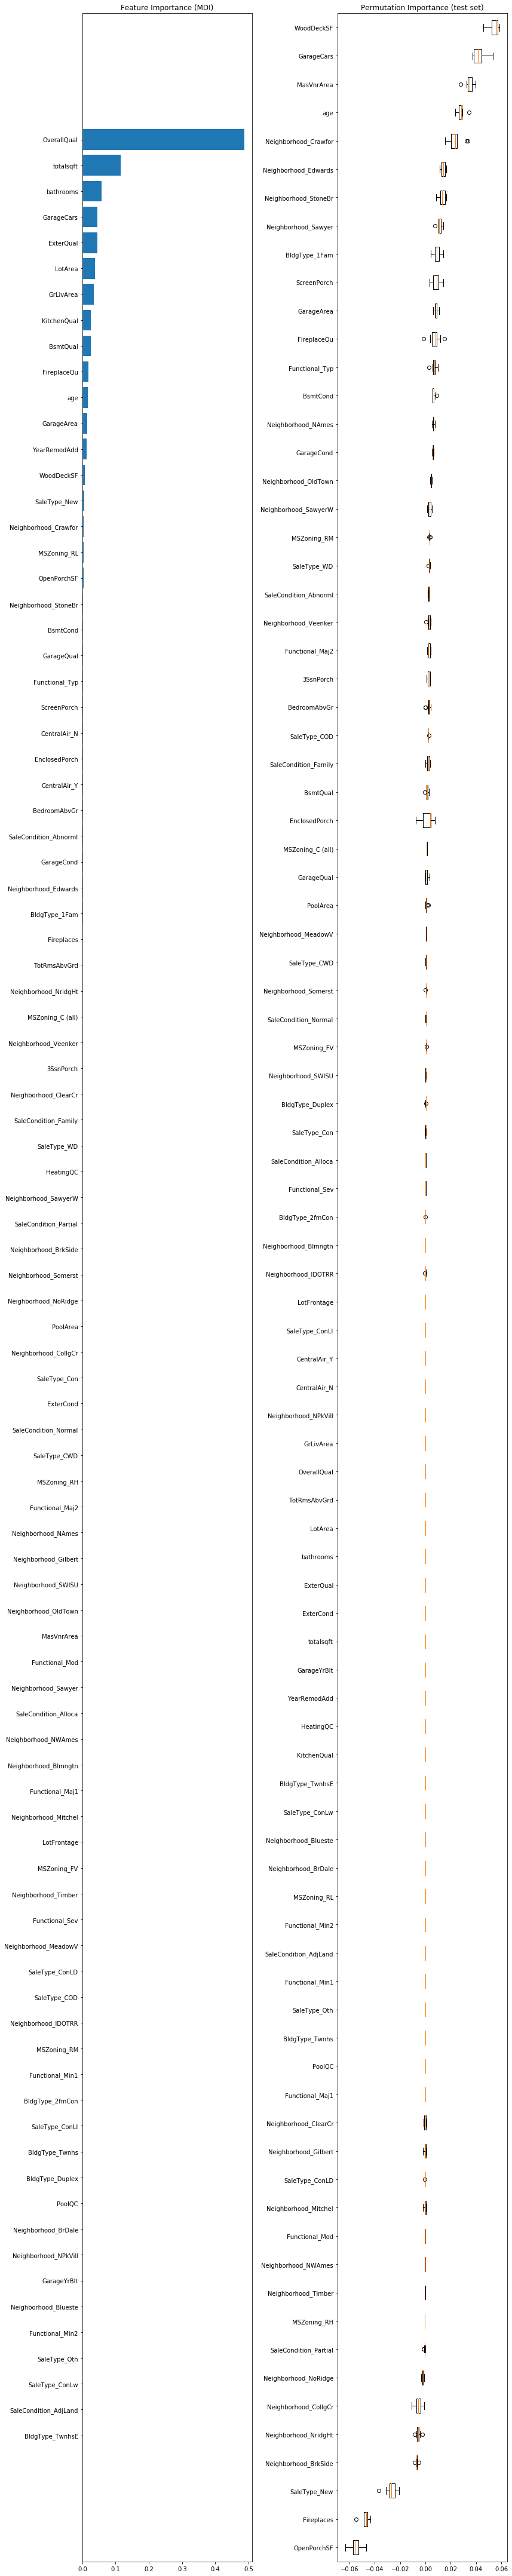

In [1155]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 60))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(cols)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, train[cols], train[['SalePrice']].values.ravel(), n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(cols)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [1156]:
pred_test = reg.predict(X_test)
pred_test

#PassengerId,Survived
test_res = test[["Id"]].copy()
test_res["SalePrice"] = pred_test
test_res.to_csv("my_predictions.csv", index=False)
test_res.head()

,Id,SalePrice
0,1461,120277.176570
1,1462,153649.839399
2,1463,184657.464767
3,1464,190099.232998
4,1465,178351.361135


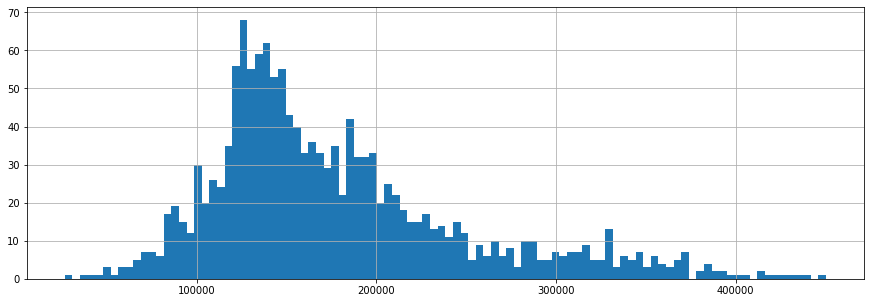

In [1157]:
test_res['SalePrice'].hist(bins=100, figsize=(15, 5))